<a href="https://colab.research.google.com/github/LaiTienQuang/week_14/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
test_path= '/content/drive/MyDrive/projectAI/food/test'
train_path= '/content/drive/MyDrive/projectAI/food/train'

In [28]:
model=Sequential()
model.add(Conv2D(128,3, activation = 'relu', input_shape=(300,300,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,3, activation = 'relu'))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(5000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 128)    0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 64)      73792     
                                                                 
 conv2d_11 (Conv2D)          (None, 145, 145, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 72, 72, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 72, 72, 32)       

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics = 'accuracy')

In [30]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.3)
test_data = ImageDataGenerator(rescale = 1./255)
######
train_generator=train_data.flow_from_directory(train_path,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')
test_generator=test_data.flow_from_directory(test_path,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [31]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics = 'accuracy')

In [32]:
history=model.fit(train_generator,
                  steps_per_epoch= 50,
                  epochs=10,
                  batch_size=32,
                  validation_data= test_generator,
                  validation_steps=10)

Epoch 1/10
50/50 [==============================] - 8s 95ms/step - loss: 2.3271 - accuracy: 0.0800 - val_loss: 2.2968 - val_accuracy: 0.1800


In [ ]:
from keras.models import load_model
model.save('food_model')

INFO:tensorflow:Assets written to: fruit_model/assets


In [33]:
test_generator.class_indices

{'BanhMi': 0,
 'Banhcuon': 1,
 'Banhtrangnuong': 2,
 'BunBo': 3,
 'Bunthitnuong': 4,
 'Comtam': 5,
 'Goicuon': 6,
 'HuTieu': 7,
 'Miquang': 8,
 'Pho': 9}

GOI CUON


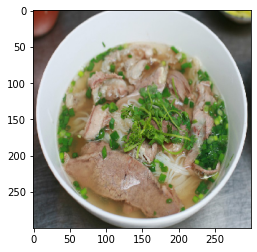

In [36]:
from keras.preprocessing.image import image
img=image.load_img('/content/drive/MyDrive/projectAI/food/test/Pho/Pho_1.jpg',target_size=(300,300))
plt.imshow(img)
plt.show
  
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
#val=np.model.predict(images)

val=np.argmax(model.predict(images))

if val==0:
  print('BANH MI')
elif val==1:
  print('BANH CUON')
elif val==2:
  print('BANH TRANG NUONG')
elif val==3:
  print('BUN BO')
elif val==4:
  print('BUN THIT NUONG')
elif val==5:
  print('COM TAM')
elif val==6:
  print('GOI CUON')
elif val==7:
  print('HU TIEU')
elif val==8:
  print('MI QUANG')
elif val==9:
  print('PHO')